<a href="https://colab.research.google.com/github/AyodejiIbimilua/dsn-ai-bootcamp-2020/blob/main/Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install xgboost

In [ ]:
pip install catboost

     |████████████████████████████████| 66.3MB 56kB/s 


In [ ]:
pip install lightgbm

In [ ]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder, PowerTransformer, QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Zindi/UmojaHack/Train.csv')
test = pd.read_csv('/content/drive/MyDrive/Zindi/UmojaHack/Test.csv')
ss = pd.read_csv('/content/drive/MyDrive/Zindi/UmojaHack/SampleSubmission.csv')
variable_def = pd.read_csv('/content/drive/MyDrive/Zindi/UmojaHack/VariableDefinitions_-_Sheet1.csv')

raw_test = test.copy()


In [ ]:
data

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,ZZA1SES,2010-05-25,2011-05-24,Female,30,2010-05-25,1,NaN,Black,Range Rover,Ibeju/Lekki,Ibeju-Lekki,Car Classic,1
12075,ZZDAC3K,2010-10-03,2011-10-02,Female,59,2010-10-03,1,NaN,NaN,NaN,NaN,NaN,Car Classic,0
12076,ZZIU2XC,2010-10-10,2011-10-08,Male,34,2010-10-10,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
12077,ZZRQ1NF,2010-02-27,2011-02-26,NaN,120,2010-02-27,2,NaN,White,TOYOTA,Victoria Island,Lagos,CVTP,0


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,12079.0,42.234539,97.492565,-6099.0,35.0,41.0,50.0,320.0
No_Pol,12079.0,1.307227,0.733085,1.0,1.0,1.0,1.0,10.0
target,12079.0,0.120457,0.325509,0.0,0.0,0.0,0.0,1.0


In [ ]:
data.isnull().sum()

ID                           0
Policy Start Date            0
Policy End Date              0
Gender                     359
Age                          0
First Transaction Date       0
No_Pol                       0
Car_Category              3738
Subject_Car_Colour        6962
Subject_Car_Make          2476
LGA_Name                  6476
State                     6488
ProductName                  0
target                       0
dtype: int64

In [ ]:
data.dtypes

ID                        object
Policy Start Date         object
Policy End Date           object
Gender                    object
Age                        int64
First Transaction Date    object
No_Pol                     int64
Car_Category              object
Subject_Car_Colour        object
Subject_Car_Make          object
LGA_Name                  object
State                     object
ProductName               object
target                     int64
dtype: object

In [ ]:
del data["ID"]
del data["First Transaction Date"]

In [ ]:
# data = data[data.columns[data.isnull().mean() < 0.4]] 

In [ ]:
pr_col = data.columns

In [ ]:
data

,Policy Start Date,Policy End Date,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,2010-05-14,2011-05-13,Male,30,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,2010-11-29,2011-11-28,Female,79,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,2010-03-21,2011-03-20,Male,43,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,2010-08-21,2011-08-20,Male,2,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,2010-08-29,2010-12-31,Entity,20,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12074,2010-05-25,2011-05-24,Female,30,1,NaN,Black,Range Rover,Ibeju/Lekki,Ibeju-Lekki,Car Classic,1
12075,2010-10-03,2011-10-02,Female,59,1,NaN,NaN,NaN,NaN,NaN,Car Classic,0
12076,2010-10-10,2011-10-08,Male,34,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
12077,2010-02-27,2011-02-26,NaN,120,2,NaN,White,TOYOTA,Victoria Island,Lagos,CVTP,0


In [ ]:
date_col = ['Policy Start Date', 'Policy End Date']

for feat in date_col:
    data[feat] = pd.to_datetime(data[feat])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Policy Start Date   12079 non-null  datetime64[ns]
 1   Policy End Date     12079 non-null  datetime64[ns]
 2   Gender              11720 non-null  object        
 3   Age                 12079 non-null  int64         
 4   No_Pol              12079 non-null  int64         
 5   Car_Category        8341 non-null   object        
 6   Subject_Car_Colour  5117 non-null   object        
 7   Subject_Car_Make    9603 non-null   object        
 8   LGA_Name            5603 non-null   object        
 9   State               5591 non-null   object        
 10  ProductName         12079 non-null  object        
 11  target              12079 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(7)
memory usage: 1.1+ MB


In [ ]:
data["Policy_date_difference"] = (data["Policy End Date"] - data["Policy Start Date"]).dt.days

In [ ]:
def extract_date_info(df,cols,):
    for feat in cols:
        df[feat +'_year'] = df[feat].dt.year
        df[feat +'_day'] = df[feat].dt.day
        df[feat +'_month'] = df[feat].dt.month
        df[feat +'_quarter'] = df[feat].dt.quarter
        df[feat +'_year_end'] = df[feat].dt.is_year_end
        df[feat +'_quarter_month_end'] = df[feat].dt.is_month_end
    df.drop(columns=date_col,axis=1,inplace=True)


In [ ]:
extract_date_info(data,date_col)

In [ ]:
data["Age"] = data['Age'].map(lambda x: 42 if x < 0 else x)

In [ ]:
data.Age.value_counts()

40     821
50     628
41     491
36     486
38     472
      ... 
90       1
100      1
140      1
133      1
102      1
Name: Age, Length: 101, dtype: int64

In [ ]:
data

,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Policy_date_difference,Policy Start Date_year,Policy Start Date_day,Policy Start Date_month,Policy Start Date_quarter,Policy Start Date_year_end,Policy Start Date_quarter_month_end,Policy End Date_year,Policy End Date_day,Policy End Date_month,Policy End Date_quarter,Policy End Date_year_end,Policy End Date_quarter_month_end
0,Male,30,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0,364,2010,14,5,2,False,False,2011,13,5,2,False,False
1,Female,79,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1,364,2010,29,11,4,False,False,2011,28,11,4,False,False
2,Male,43,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0,364,2010,21,3,1,False,False,2011,20,3,1,False,False
3,Male,2,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0,364,2010,21,8,3,False,False,2011,20,8,3,False,False
4,Entity,20,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1,124,2010,29,8,3,False,False,2010,31,12,4,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,Female,30,1,NaN,Black,Range Rover,Ibeju/Lekki,Ibeju-Lekki,Car Classic,1,364,2010,25,5,2,False,False,2011,24,5,2,False,False
12075,Female,59,1,NaN,NaN,NaN,NaN,NaN,Car Classic,0,364,2010,3,10,4,False,False,2011,2,10,4,False,False
12076,Male,34,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0,363,2010,10,10,4,False,False,2011,8,10,4,False,False
12077,NaN,120,2,NaN,White,TOYOTA,Victoria Island,Lagos,CVTP,0,364,2010,27,2,1,False,False,2011,26,2,1,False,False


In [ ]:
mapper = {"Male":"M","Female":'F','Entity':'O','Joint Gender':'O','B':'O','NO GENDER':'O','NOT STATED':'O','SEX':'O' }

In [ ]:
data.Gender = data.Gender.map(mapper)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Gender                               11720 non-null  object
 1   Age                                  12079 non-null  int64 
 2   No_Pol                               12079 non-null  int64 
 3   Car_Category                         8341 non-null   object
 4   Subject_Car_Colour                   5117 non-null   object
 5   Subject_Car_Make                     9603 non-null   object
 6   LGA_Name                             5603 non-null   object
 7   State                                5591 non-null   object
 8   ProductName                          12079 non-null  object
 9   target                               12079 non-null  int64 
 10  Policy_date_difference               12079 non-null  int64 
 11  Policy Start Date_year               1207

In [ ]:
X, y = data.loc[:, data.columns != 'target'], data.loc[:, ["target"]].astype(int).values.ravel()

In [ ]:
cats = ["object", "bool"]
cat_cols = X.select_dtypes(include=cats).columns

numerics = ["int64"]
num_cols = X.select_dtypes(include=numerics).columns

In [ ]:
cat_cols

Index(['Gender', 'Car_Category', 'Subject_Car_Colour', 'Subject_Car_Make',
       'LGA_Name', 'State', 'ProductName', 'Policy Start Date_year_end',
       'Policy Start Date_quarter_month_end', 'Policy End Date_year_end',
       'Policy End Date_quarter_month_end'],
      dtype='object')

In [ ]:
# q_low = X_train[num_cols].quantile(0.01)
# q_hi  = X_train[num_cols].quantile(0.99)

# X_train = X_train[(X_train[num_cols] < q_hi) & (X_train[num_cols] > q_low)]

In [ ]:
X[cat_cols] = X[cat_cols].astype(str)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
num_cols

Index(['Age', 'No_Pol', 'Policy_date_difference', 'Policy Start Date_year',
       'Policy Start Date_day', 'Policy Start Date_month',
       'Policy Start Date_quarter', 'Policy End Date_year',
       'Policy End Date_day', 'Policy End Date_month',
       'Policy End Date_quarter'],
      dtype='object')

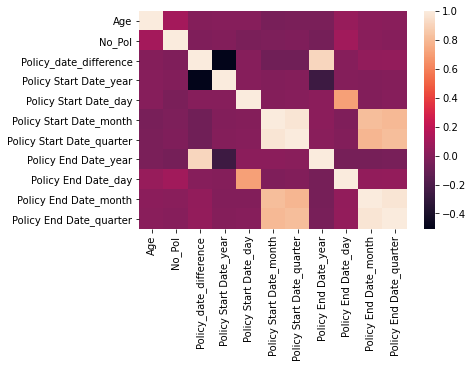

In [ ]:
sns.heatmap(data=X[num_cols].corr())

In [ ]:
X[num_cols].corr()

,Age,No_Pol,Policy_date_difference,Policy Start Date_year,Policy Start Date_day,Policy Start Date_month,Policy Start Date_quarter,Policy End Date_year,Policy End Date_day,Policy End Date_month,Policy End Date_quarter
Age,1.000000,0.110669,0.000519,0.002680,0.005868,-0.041823,-0.040119,-0.035755,0.061923,0.019328,0.018359
No_Pol,0.110669,1.000000,-0.019347,-0.005399,-0.037903,-0.024523,-0.020262,-0.053160,0.096912,0.016258,0.006099
Policy_date_difference,0.000519,-0.019347,1.000000,-0.504409,0.003873,-0.070754,-0.072876,0.913494,0.003853,0.047307,0.050186
Policy Start Date_year,0.002680,-0.005399,-0.504409,1.000000,0.003147,-0.006870,-0.003032,-0.262202,-0.003829,-0.004960,-0.002198
Policy Start Date_day,0.005868,-0.037903,0.003873,0.003147,1.000000,-0.001101,0.004158,0.022890,0.706354,-0.008156,0.001014
Policy Start Date_month,-0.041823,-0.024523,-0.070754,-0.006870,-0.001101,1.000000,0.972067,0.018992,-0.018584,0.821829,0.800945
Policy Start Date_quarter,-0.040119,-0.020262,-0.072876,-0.003032,0.004158,0.972067,1.000000,0.017538,-0.009344,0.793916,0.820687
Policy End Date_year,-0.035755,-0.053160,0.913494,-0.262202,0.022890,0.018992,0.017538,1.000000,-0.047707,-0.050607,-0.041993
Policy End Date_day,0.061923,0.096912,0.003853,-0.003829,0.706354,-0.018584,-0.009344,-0.047707,1.000000,0.046299,0.049476
Policy End Date_month,0.019328,0.016258,0.047307,-0.004960,-0.008156,0.821829,0.793916,-0.050607,0.046299,1.000000,0.971618


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())

cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))

processor = make_column_transformer((num_pipeline, num_cols), (cat_pipeline, cat_cols))

In [ ]:
# models = [
#     ("KNN", KNeighborsClassifier(5)),
#     ("SVC LINER", SVC(kernel="linear", C=0.05)),
#     ("SVC", SVC(gamma=2, C=1)),
#     ("DECISION TREE", DecisionTreeClassifier(max_depth=5)),
#     ("RANDOM FOREST", RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)),
#     ("MLP", MLPClassifier(alpha=1, max_iter=1000)),
#     ("ADA BOOST", AdaBoostClassifier()),
#     ("LOGISTIC REGRESSION", LogisticRegression(max_iter=1000)),
#     ("BAGGING CLASSIFIER", BaggingClassifier()),
#     ("LGBM", LGBMClassifier()),
#     ("CATBOOST", CatBoostClassifier(verbose=False)),
#     ("XGB", XGBClassifier()),
#     ("GRADIENT BOOSTING", GradientBoostingClassifier())
#     ]

# accuracies = []

In [ ]:
# for name, model in models:
#     clf = make_pipeline(processor, model)
#     cv = KFold(n_splits=5, shuffle=True, random_state=1)
#     scores = cross_val_score(clf, X_train, y_train, cv=cv)
#     print('{}: {:.3f} ({:.3f})'.format(name, np.mean(scores), np.std(scores)))

In [ ]:
# def get_models():
# 	models = dict()
# 	for i in range(2, 15):
# 		rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
# 		model = DecisionTreeClassifier()
# 		models[str(i)] = make_pipeline(processor, rfe, model)
# 	return models

In [ ]:
# models = get_models()
# results, names = list(), list()

# for name, model in models.items():
#   cv = KFold(n_splits=5, shuffle=True, random_state=1)
#   scores = cross_val_score(model, X_train, y_train, cv=cv)
#   results.append(scores)
#   names.append(name)
#   print('{}: {:.3f} ({:.3f})'.format(name, np.mean(scores), np.std(scores)))


In [ ]:
# #plot model performance for comparison
# plt.boxplot(results, labels=names, showmeans=True)
# plt.show()

In [ ]:
# for i in range(X.shape[1]):
# 	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=2)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('cb', LGBMClassifier()), ('cbu', CatBoostClassifier(iterations=3000)), ('rb', RandomForestClassifier()), ('XXXb', XGBClassifier())]

voter = VotingClassifier(estimators=estimators, voting='soft', weights=[1,1,1])
stackk = StackingClassifier(estimators=estimators, final_estimator=DecisionTreeRegressor())

In [ ]:
classfier = make_pipeline(processor, stackk)
# cv = KFold(n_splits=5, shuffle=True, random_state=1)
# scores = cross_val_score(classfier, X_train, y_train, cv=cv)

In [ ]:
# print('Accuracy: {:.3f} ({:.3f})'.format(np.mean(scores), np.std(scores)))

In [ ]:
# scores.std()

In [ ]:
# classfier.fit(X_train, y_train)

In [ ]:
# y_pred = classfier.predict(X_test)

In [ ]:
# from sklearn.metrics import classification_report

# target_names = ['class 0', 'class 1']
# print('*************** Classification report on test set ********************')
# print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
# from sklearn.metrics import classification_report

# target_names = ['class 0', 'class 1']
# print('*************** Classification report on train set ********************')
# print(classification_report(y_train, classfier.predict(X_train), target_names=target_names))

*************** Classification report on train set ********************
              precision    recall  f1-score   support

     class 0       0.90      0.99      0.94      7446
     class 1       0.67      0.16      0.25      1009

    accuracy                           0.89      8455
   macro avg       0.78      0.57      0.60      8455
weighted avg       0.87      0.89      0.86      8455



**TEST SET PREPARATION**

In [ ]:
test

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
0,009D84L,2010-04-24,2011-03-27,NO GENDER,25,2010-04-24,1,NaN,As Attached,Iveco,Victoria Island,Lagos,CVTP
1,01DO2EQ,2010-01-01,2010-12-31,NaN,120,2010-01-01,4,NaN,As Attached,TOYOTA,Victoria Island,Lagos,Muuve
2,01QM0NU,2010-10-23,2011-10-22,Female,46,2010-10-23,1,NaN,NaN,Ford,Abuja Municipal,Abuja-Municipal,Car Classic
3,024NJLZ,2010-10-14,2011-10-13,Male,32,2010-10-14,1,NaN,NaN,NaN,Kosofe,Benue,Car Classic
4,02BYET3,2010-09-16,2010-12-31,NaN,120,2010-09-16,4,NaN,NaN,TOYOTA,Victoria Island,Lagos,Muuve
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5172,ZYXX5AF,2010-07-18,2011-07-17,Male,48,2010-07-18,1,Saloon,NaN,Honda,NaN,NaN,CarSafe
5173,ZYYOZ5L,2010-12-04,2011-12-03,NaN,50,2010-12-04,1,NaN,NaN,NaN,Victoria Island,Lagos,Car Classic
5174,ZZ1GTKD,2010-09-24,2011-09-23,Male,1,2010-09-24,1,NaN,NaN,NaN,NaN,NaN,CarSafe
5175,ZZDXQSI,2010-07-17,2011-07-16,Female,52,2010-07-17,1,Saloon,Grey,TOYOTA,NaN,NaN,Car Classic


In [ ]:
del test["ID"]
del test["First Transaction Date"]

In [ ]:
date_col = ['Policy Start Date', 'Policy End Date']

for feat in date_col:
    test[feat] = pd.to_datetime(test[feat])

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5177 entries, 0 to 5176
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Policy Start Date   5177 non-null   datetime64[ns]
 1   Policy End Date     5177 non-null   datetime64[ns]
 2   Gender              5021 non-null   object        
 3   Age                 5177 non-null   int64         
 4   No_Pol              5177 non-null   int64         
 5   Car_Category        3539 non-null   object        
 6   Subject_Car_Colour  2172 non-null   object        
 7   Subject_Car_Make    4116 non-null   object        
 8   LGA_Name            2395 non-null   object        
 9   State               2389 non-null   object        
 10  ProductName         5177 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 445.0+ KB


In [ ]:
test["Policy_date_difference"] = (test["Policy End Date"] - test["Policy Start Date"]).dt.days

In [ ]:
extract_date_info(test,date_col)

In [ ]:
test["Age"] = test['Age'].map(lambda x: 42 if x < 0 else x)

In [ ]:
test.Gender = test.Gender.map(mapper)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5177 entries, 0 to 5176
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Gender                               5021 non-null   object
 1   Age                                  5177 non-null   int64 
 2   No_Pol                               5177 non-null   int64 
 3   Car_Category                         3539 non-null   object
 4   Subject_Car_Colour                   2172 non-null   object
 5   Subject_Car_Make                     4116 non-null   object
 6   LGA_Name                             2395 non-null   object
 7   State                                2389 non-null   object
 8   ProductName                          5177 non-null   object
 9   Policy_date_difference               5177 non-null   int64 
 10  Policy Start Date_year               5177 non-null   int64 
 11  Policy Start Date_day                5177 n

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5177 entries, 0 to 5176
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Gender                               5021 non-null   object
 1   Age                                  5177 non-null   int64 
 2   No_Pol                               5177 non-null   int64 
 3   Car_Category                         3539 non-null   object
 4   Subject_Car_Colour                   2172 non-null   object
 5   Subject_Car_Make                     4116 non-null   object
 6   LGA_Name                             2395 non-null   object
 7   State                                2389 non-null   object
 8   ProductName                          5177 non-null   object
 9   Policy_date_difference               5177 non-null   int64 
 10  Policy Start Date_year               5177 non-null   int64 
 11  Policy Start Date_day                5177 n

In [ ]:
test = test[X.columns]

**BUILD FINAL MODEL**

In [ ]:
final_model = make_pipeline(processor, stackk)

In [ ]:
final_model.fit(X, y)

Streaming output truncated to the last 5000 lines.
1001:	learn: 0.2674603	total: 7.29s	remaining: 14.5s
1002:	learn: 0.2674398	total: 7.3s	remaining: 14.5s
1003:	learn: 0.2674145	total: 7.31s	remaining: 14.5s
1004:	learn: 0.2674085	total: 7.32s	remaining: 14.5s
1005:	learn: 0.2673732	total: 7.32s	remaining: 14.5s
1006:	learn: 0.2673695	total: 7.33s	remaining: 14.5s
1007:	learn: 0.2673665	total: 7.34s	remaining: 14.5s
1008:	learn: 0.2673504	total: 7.34s	remaining: 14.5s
1009:	learn: 0.2672869	total: 7.35s	remaining: 14.5s
1010:	learn: 0.2672668	total: 7.36s	remaining: 14.5s
1011:	learn: 0.2672438	total: 7.36s	remaining: 14.5s
1012:	learn: 0.2672008	total: 7.37s	remaining: 14.5s
1013:	learn: 0.2671693	total: 7.38s	remaining: 14.5s
1014:	learn: 0.2671645	total: 7.39s	remaining: 14.4s
1015:	learn: 0.2671233	total: 7.39s	remaining: 14.4s
1016:	learn: 0.2671042	total: 7.4s	remaining: 14.4s
1017:	learn: 0.2670611	total: 7.41s	remaining: 14.4s
1018:	learn: 0.2670533	total: 7.42s	remaining: 14.

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline-1',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                             

In [ ]:
set(raw_test.ID == ss.ID)

{True}

In [ ]:
prediction = final_model.predict(test)

In [ ]:
set(X.columns == test.columns)

{True}

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


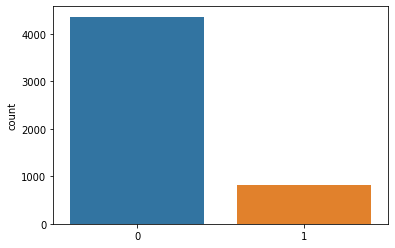

In [ ]:
sns.countplot(prediction)

In [ ]:
sub_file = ss.copy()

In [ ]:
sub_file.target = prediction

In [ ]:
sub_file.to_csv('21.csv',index=False)